In [31]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
from random import randint
import scipy.stats as sts
import plotly.express as px
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings('ignore')

df = pd.read_csv('primary-tumor.data', on_bad_lines='skip', header=None)
df.rename(columns={0: 'class', 1: 'age', 2: 'sex', 3: 'histologic-type', 4: 'degree-of-diffe', 5: 'bone', 6: 'bone-marrow', 7: 'lung', 8: 'pleura', 9: 'peritoneum', 10: 'liver', 11: 'brain', 12: 'skin', 13: 'neck', 14: 'supraclavicular', 15: 'axillar', 16: 'mediastinum', 17: 'abdominal'}, inplace=True)
df.drop(['histologic-type','degree-of-diffe'], axis = 1, inplace=True)

SexIndexes = df.index[df['sex'].str.match('\?')].tolist()
for index in SexIndexes:
  if (df.iloc[index])['class'] == '22' or (df.iloc[index])['class'] == '21' or (df.iloc[index])['class'] == '20' or (df.iloc[index])['class'] == '19':
    df.at[index, 'sex'] = 2
  elif (df.iloc[index])['class'] == '18' or (df.iloc[index])['class'] == '17' or (df.iloc[index])['class'] == '16':
    df.at[index, 'sex'] = 1
  else:
    df.at[index, 'sex'] = randint(1,2)
df['sex'] = pd.to_numeric(df['sex'])

SkinIndexes = df.index[df['skin'].str.match('\?')].tolist()
for index in SkinIndexes:
  df.at[index, 'skin'] = randint(1,2)
df['skin'] = pd.to_numeric(df['skin'])

AxillarIndexes = df.index[df['axillar'].str.match('\?')].tolist()
for index in AxillarIndexes:
  df.at[index, 'axillar'] = randint(1,2)
df['axillar'] = pd.to_numeric(df['axillar'])

df

,class,age,sex,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,1,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2
1,1,1,1,2,2,2,2,2,1,2,2,2,1,2,1,2
2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,1,2,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,1,2,1,2,1,1,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,22,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2
335,22,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2
336,22,2,2,1,2,2,2,2,2,2,2,2,1,1,2,2
337,22,3,2,2,2,2,2,2,2,2,2,1,1,1,2,2


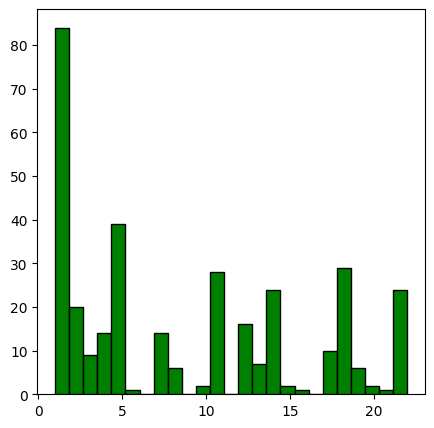

1     84
5     39
18    29
11    28
14    24
22    24
2     20
12    16
7     14
4     14
17    10
3      9
13     7
8      6
19     6
10     2
15     2
20     2
6      1
16     1
21     1
Name: class, dtype: int64

In [32]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.hist(df['class'], edgecolor = 'black', color='green', bins=25)
plt.show()
df['class'].value_counts()

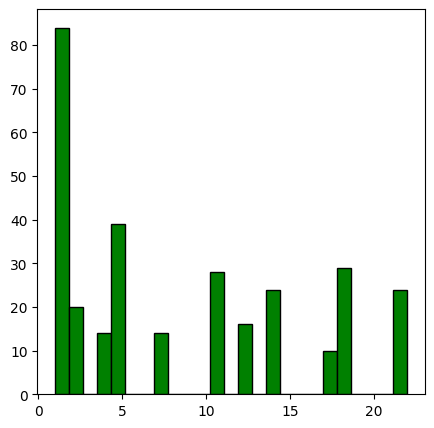

1     84
5     39
18    29
11    28
14    24
22    24
2     20
12    16
4     14
7     14
17    10
Name: class, dtype: int64

In [33]:
deleteArray = []
for index, row in df.iterrows():
  if df['class'][index] == 21:
    deleteArray.append(index)
  if df['class'][index] == 16:
    deleteArray.append(index)
  if df['class'][index] == 6:
    deleteArray.append(index)
  if df['class'][index] == 20:
    deleteArray.append(index)
  if df['class'][index] == 15:
    deleteArray.append(index)
  if df['class'][index] == 10:
    deleteArray.append(index)
  if df['class'][index] == 3:
    deleteArray.append(index)
  if df['class'][index] == 13:
    deleteArray.append(index)
  if df['class'][index] == 8:
    deleteArray.append(index)
  if df['class'][index] == 19:
    deleteArray.append(index)

#print(deleteArray)
df.drop(index = deleteArray, inplace=True)

fig, ax = plt.subplots(figsize = (5, 5))
ax.hist(df['class'], edgecolor = 'black', color='green', bins=25)
plt.show()
df['class'].value_counts()

In [34]:
dfX = df.copy()

dfX.drop(['class'], axis = 1, inplace=True)

dfX

,age,sex,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2
1,1,1,2,2,2,2,2,1,2,2,2,1,2,1,2
2,1,2,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,2,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,2,1,2,1,1,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2
335,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2
336,2,2,1,2,2,2,2,2,2,2,2,1,1,2,2
337,3,2,2,2,2,2,2,2,2,2,1,1,1,2,2


In [35]:
dfY = df['class']

dfY

0       1
1       1
2       1
3       1
4       1
       ..
334    22
335    22
336    22
337    22
338    22
Name: class, Length: 302, dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(dfX, dfY, train_size=0.8)

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.transform(x_train)

pca = PCA(n_components=2).fit(x_train)
pca_2d_test = pca.transform(x_test)
#pca_2d

In [38]:
param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel':param_kernel, 'C': [1,10]}
model=SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)
grid_search_svm.fit(pca_2d, y_train)

best_model = grid_search_svm.best_estimator_
best_model.kernel

'rbf'

In [39]:
print(best_model.support_.size)

227


In [40]:
svm_preds = best_model.predict(pca_2d_test)
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           1       0.37      0.88      0.52        16
           2       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         3
          11       0.25      0.14      0.18         7
          12       0.50      1.00      0.67         3
          14       0.00      0.00      0.00         6
          17       0.00      0.00      0.00         2
          18       0.38      0.60      0.46         5
          22       0.80      1.00      0.89         4

    accuracy                           0.41        61
   macro avg       0.21      0.33      0.25        61
weighted avg       0.23      0.41      0.29        61



In [41]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(pca_2d)

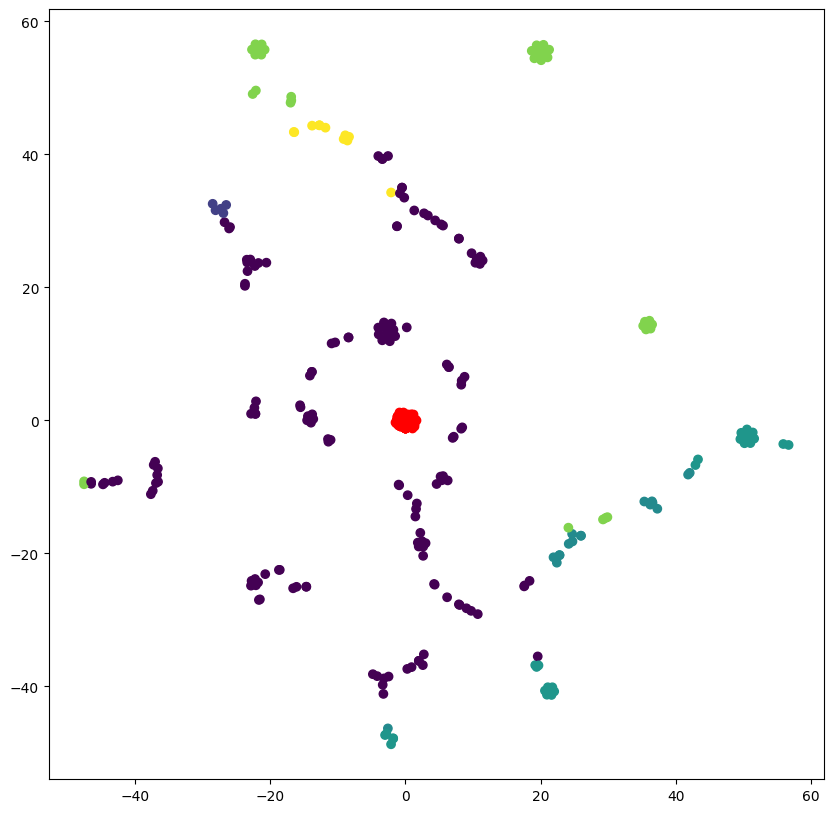

In [42]:
support_vectors = best_model.support_vectors_

plt.scatter(tsne_results[:,0], tsne_results[:,1], c=best_model.predict(pca_2d))
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.show()

In [43]:
!pip install umap-learn
import umap

In [44]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(pca_2d)

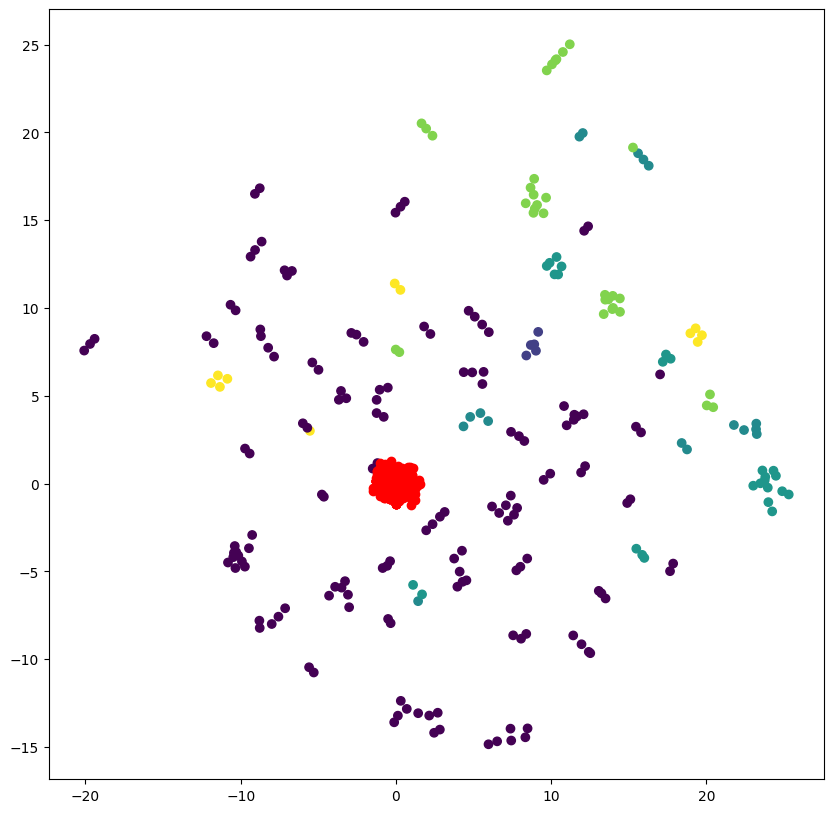

In [45]:
plt.scatter(u[:,0], u[:,1], c=best_model.predict(pca_2d))
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.show()

In [46]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, svm_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')

In [47]:
from sklearn.neighbors import RadiusNeighborsClassifier

radius = np.arange(1.0, 50.0)
model_KNN = RadiusNeighborsClassifier()
params = {"radius":radius}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)

grid_search.fit(pca_2d, y_train)

print(grid_search.best_score_)

print(grid_search.best_estimator_)

knn_preds = grid_search.predict(pca_2d_test)

print(classification_report(y_test, knn_preds))

0.37357723577235774
RadiusNeighborsClassifier()
              precision    recall  f1-score   support

           1       0.32      0.94      0.48        16
           2       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         6
          17       0.00      0.00      0.00         2
          18       0.40      0.80      0.53         5
          22       0.00      0.00      0.00         4

    accuracy                           0.31        61
   macro avg       0.07      0.16      0.09        61
weighted avg       0.12      0.31      0.17        61



In [48]:
number_of_neighbors = np.arange(3, 10)
model_KNN = KNeighborsClassifier()
params = {"n_neighbors":number_of_neighbors}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)

grid_search.fit(pca_2d, y_train)

print(grid_search.best_score_)

print(grid_search.best_estimator_)

knn_preds = grid_search.predict(pca_2d_test)

print(classification_report(y_test, knn_preds))

0.40701219512195125
KNeighborsClassifier()
              precision    recall  f1-score   support

           1       0.48      0.81      0.60        16
           2       0.67      0.80      0.73         5
           4       0.00      0.00      0.00         2
           5       0.33      0.12      0.18         8
           7       0.00      0.00      0.00         3
          11       0.25      0.29      0.27         7
          12       0.50      0.33      0.40         3
          14       0.00      0.00      0.00         6
          17       0.00      0.00      0.00         2
          18       0.50      0.60      0.55         5
          22       1.00      0.75      0.86         4

    accuracy                           0.44        61
   macro avg       0.34      0.34      0.33        61
weighted avg       0.38      0.44      0.39        61



In [49]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(pca_2d)

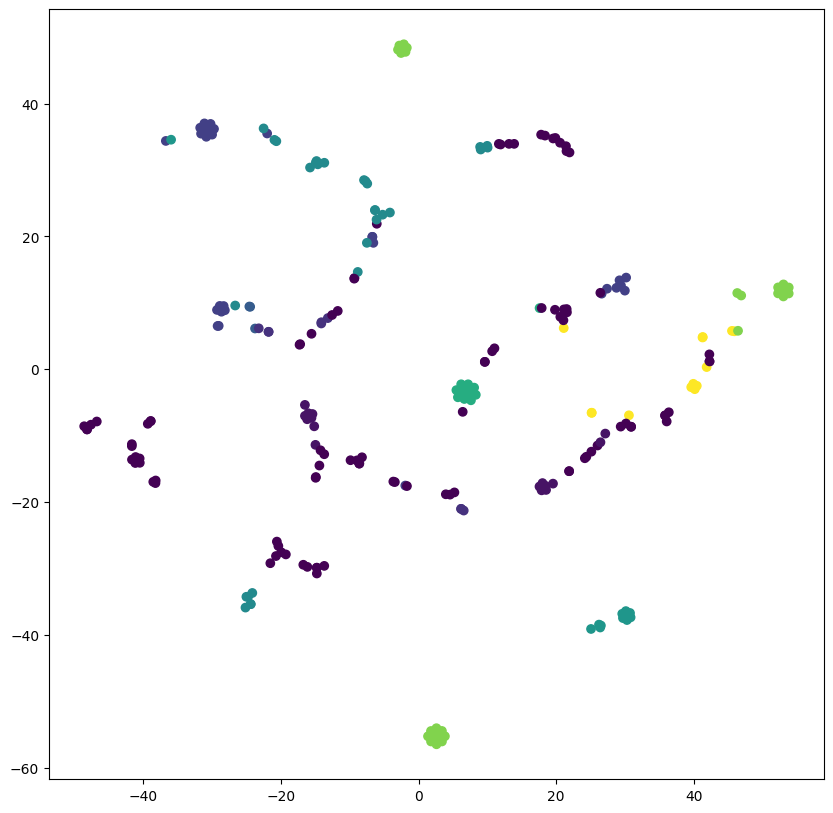

In [50]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=grid_search.predict(pca_2d))
plt.show()

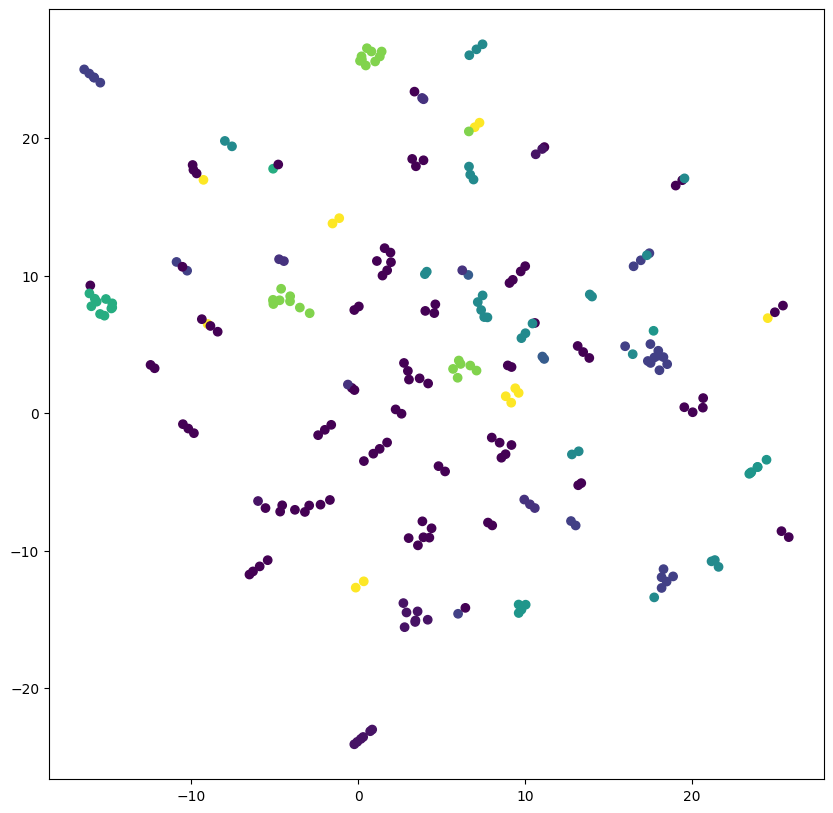

In [51]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(pca_2d)

plt.scatter(u[:,0], u[:,1], c=grid_search.predict(pca_2d))
plt.show()

In [52]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, knn_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')

In [53]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

params_grid = {
    'max_depth': [2, 30],
    'min_samples_leaf': [3, 15],
    'min_samples_split': [3, 15],
}

grid_search_random_forest = GridSearchCV(estimator=random_forest, param_grid = params_grid, scoring = 'f1_macro', cv=6)

grid_search_random_forest.fit(pca_2d, y_train)

best_model = grid_search_random_forest.best_estimator_

In [54]:
RF_preds = grid_search_random_forest.predict(pca_2d_test)

print(classification_report(y_test, RF_preds))

              precision    recall  f1-score   support

           1       0.39      0.69      0.50        16
           2       1.00      0.80      0.89         5
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         3
          11       0.20      0.14      0.17         7
          12       0.50      1.00      0.67         3
          14       0.00      0.00      0.00         6
          17       0.00      0.00      0.00         2
          18       0.38      0.60      0.46         5
          22       0.75      0.75      0.75         4

    accuracy                           0.41        61
   macro avg       0.29      0.36      0.31        61
weighted avg       0.31      0.41      0.34        61



In [55]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

params_grid = {
    'max_depth': [2, 30],
    'min_samples_leaf': [3, 15],
    'min_samples_split': [3, 15],
}

grid_search_random_forest = GridSearchCV(estimator=random_forest, param_grid = params_grid, cv=6)

grid_search_random_forest.fit(pca_2d, y_train)

best_model = grid_search_random_forest.best_estimator_

RFR_preds = grid_search_random_forest.predict(pca_2d_test)

#print(classification_report(y_test, RF_preds))

In [56]:
RFR_preds

array([15.5948885 ,  5.78775891, 13.41194676, 13.52099003,  6.0760975 ,
        5.84208135,  5.75581128,  5.84208135,  9.34213866,  5.99351679,
        5.72095004,  5.49644226,  9.17754793, 13.48426488,  5.78775891,
        6.13956555,  6.11022889, 15.5948885 , 13.01991467,  7.49694192,
       15.5948885 ,  5.49644226, 13.52099003,  9.44791644,  6.01718906,
        6.17954862,  7.7961933 , 13.119061  ,  6.02837802,  5.78775891,
       12.97453568,  8.10746412,  5.49644226,  5.72095004,  5.63658831,
       12.83444407,  5.84208135,  6.11022889,  5.96130432, 12.6532554 ,
        9.34213866,  7.71636556, 15.3953718 ,  5.63658831,  6.0760975 ,
        6.59001496,  5.78775891, 13.12972906, 13.41194676,  9.02565934,
        9.3235967 ,  5.63658831,  5.99217395, 12.80392194,  6.0760975 ,
        6.11022889,  8.72232765,  5.60172707,  9.17754793, 12.50230099,
        5.60172707])

In [57]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(pca_2d)

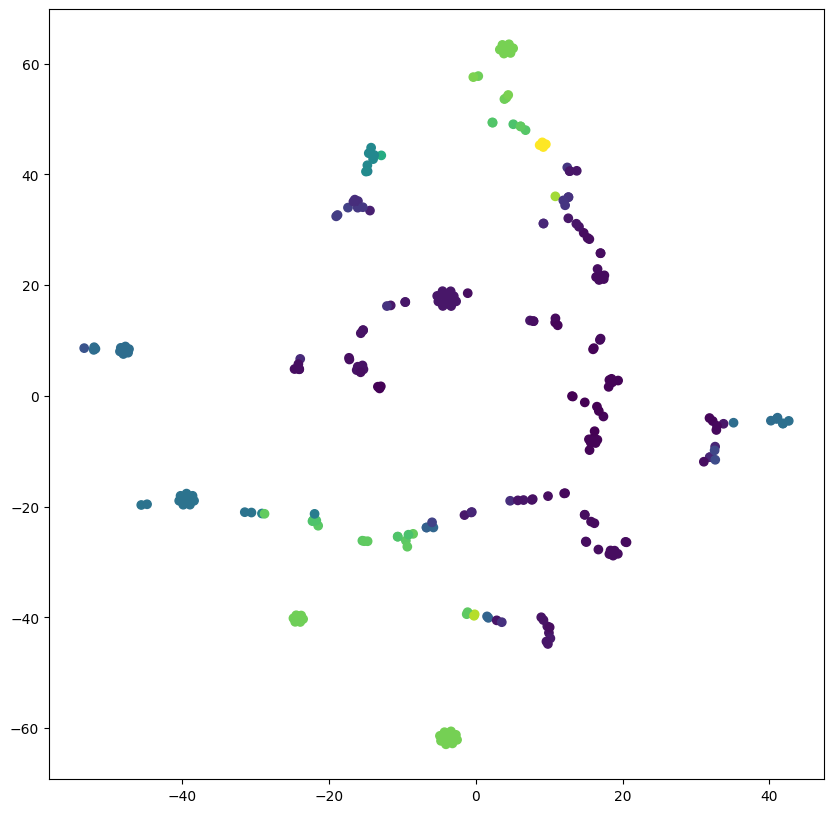

In [58]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=grid_search_random_forest.predict(pca_2d))
plt.show()

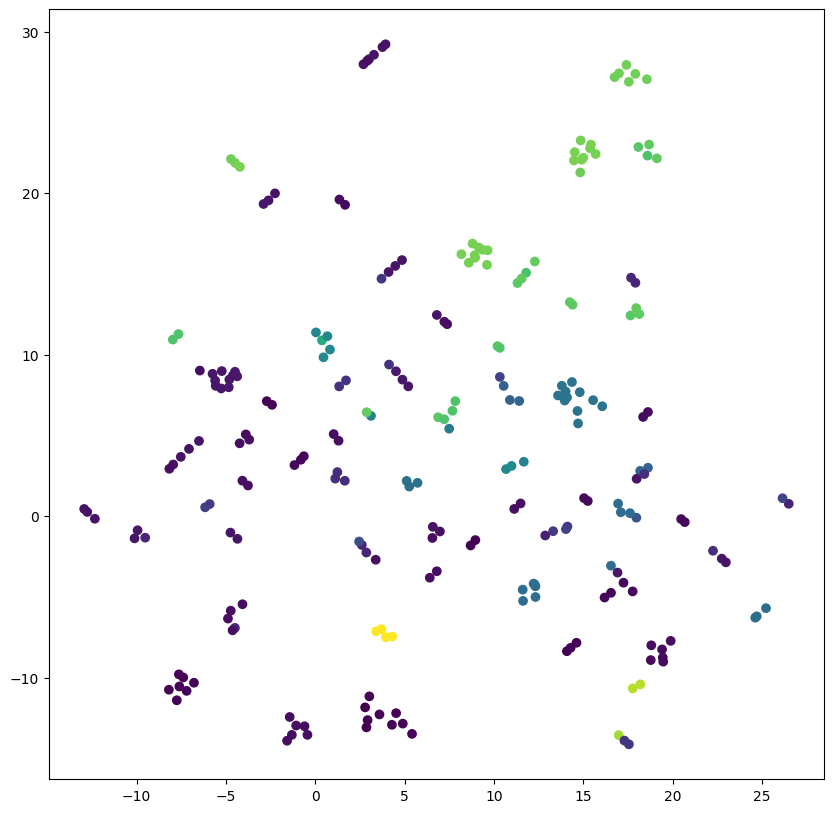

In [59]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(pca_2d)

plt.scatter(u[:,0], u[:,1], c=grid_search_random_forest.predict(pca_2d))
plt.show()

In [60]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, RF_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')